In [562]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

import warnings

# Suppress SettingWithCopyWarning
warnings.filterwarnings("ignore", category=UserWarning, module='pandas')




In [563]:

df1 = pd.read_csv("dataset/kigali_real_estate_prices.csv")
df1.head()

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Parking_Space,Furnished,Proximity_to_City_Center_km,Proximity_to_Schools_km,Security_Features,Price_RWF
0,Kibagabaga,Bungalow,170,1,2,1,2018,1,1,6.053400,1.211984,1,3545686
1,Kacyiru,Bungalow,190,2,3,1,2003,0,0,8.048860,2.283878,1,5191761
2,Kanombe,Apartment,79,4,3,1,2011,0,0,2.917929,0.416259,1,3295061
3,Remera,Villa,174,3,3,1,1989,1,0,4.955305,3.478307,1,3488814
4,Kibagabaga,House,240,3,2,3,1990,0,0,8.438079,1.543986,1,6133847


In [564]:
df1.shape

(20000, 13)

<h1>Important Columns:</1>

    <b>Location:</b> One of the most critical factors, as real estate prices vary significantly by location.
    <b>Property Type:</b> Different property types (e.g., house, apartment) have different price ranges.
    <b>Size (sqm):</b> Larger properties generally command higher prices.
    <b>Number of Bedrooms:</b> Directly related to the property's size and suitability for larger families.
    <b>Number of Bathrooms:</b> An important feature that can influence the value, especially in larger homes.
    <b>Number of Floors:</b> Relevant, particularly in the context of luxury homes or villas.
    <b>Year Built:</b> Newer properties may be valued higher, depending on the market.
    <b>Parking Space:</b> In urban areas, especially, having parking can significantly influence the price.
    <b>Furnished: </b> A furnished property might command a higher price, especially in rental markets.
    <b>Proximity to City Center (km):</b> Properties closer to city centers are usually more expensive.
   <b> Proximity to Schools (km):</b> Especially important for families, which can impact demand and pricing.
   <b> Price (RWF): </b> This is the target variable and is, of course, essential.

In [565]:
df1.head()

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Parking_Space,Furnished,Proximity_to_City_Center_km,Proximity_to_Schools_km,Security_Features,Price_RWF
0,Kibagabaga,Bungalow,170,1,2,1,2018,1,1,6.053400,1.211984,1,3545686
1,Kacyiru,Bungalow,190,2,3,1,2003,0,0,8.048860,2.283878,1,5191761
2,Kanombe,Apartment,79,4,3,1,2011,0,0,2.917929,0.416259,1,3295061
3,Remera,Villa,174,3,3,1,1989,1,0,4.955305,3.478307,1,3488814
4,Kibagabaga,House,240,3,2,3,1990,0,0,8.438079,1.543986,1,6133847


<h1>Data Cleaning</h1>

In [566]:
df1.columns

Index(['Location', 'Property_Type', 'Size_sqm', 'Number_of_Bedrooms',
       'Number_of_Bathrooms', 'Number_of_Floors', 'Year_Built',
       'Parking_Space', 'Furnished', 'Proximity_to_City_Center_km',
       'Proximity_to_Schools_km', 'Security_Features', 'Price_RWF'],
      dtype='object')

In [567]:
# drop unnecessary columns for house price prediction
df2=df1.drop(['Security_Features'], axis=1) #axis=1=== axis='columns'
df2.head()

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Parking_Space,Furnished,Proximity_to_City_Center_km,Proximity_to_Schools_km,Price_RWF
0,Kibagabaga,Bungalow,170,1,2,1,2018,1,1,6.053400,1.211984,3545686
1,Kacyiru,Bungalow,190,2,3,1,2003,0,0,8.048860,2.283878,5191761
2,Kanombe,Apartment,79,4,3,1,2011,0,0,2.917929,0.416259,3295061
3,Remera,Villa,174,3,3,1,1989,1,0,4.955305,3.478307,3488814
4,Kibagabaga,House,240,3,2,3,1990,0,0,8.438079,1.543986,6133847


In [568]:
# START DATA CLEANING PROCESS
df2.isnull().sum()

Location                       0
Property_Type                  0
Size_sqm                       0
Number_of_Bedrooms             0
Number_of_Bathrooms            0
Number_of_Floors               0
Year_Built                     0
Parking_Space                  0
Furnished                      0
Proximity_to_City_Center_km    0
Proximity_to_Schools_km        0
Price_RWF                      0
dtype: int64

In [569]:
df2['Location'].unique()

array(['Kibagabaga', 'Kacyiru', 'Kanombe', 'Remera', 'Nyamirambo',
       'Gacuriro', 'Kimironko', 'Nyarutarama', 'Kicukiro'], dtype=object)

In [570]:
df2['Property_Type'].unique()

array(['Bungalow', 'Apartment', 'Villa', 'House'], dtype=object)

In [571]:
df2.head(3)

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Parking_Space,Furnished,Proximity_to_City_Center_km,Proximity_to_Schools_km,Price_RWF
0,Kibagabaga,Bungalow,170,1,2,1,2018,1,1,6.053400,1.211984,3545686
1,Kacyiru,Bungalow,190,2,3,1,2003,0,0,8.048860,2.283878,5191761
2,Kanombe,Apartment,79,4,3,1,2011,0,0,2.917929,0.416259,3295061


In [572]:
# Back to locations
len(df2.Location.unique())

9

In [573]:
# Dimensionality Reduction to reduce dimensions
df2.Location = df2.Location.apply(lambda x: x.strip())
location_stats = df2.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
Kibagabaga     2317
Kacyiru        2268
Kimironko      2268
Gacuriro       2250
Nyarutarama    2241
Remera         2185
Nyamirambo     2173
Kicukiro       2172
Kanombe        2126
Name: Location, dtype: int64

In [574]:
location_stats.values.sum()

20000

In [575]:
len(location_stats[location_stats<10])

0

In [576]:
location_stats_less_than_10 = location_stats[location_stats<10]
location_stats_less_than_10

Series([], Name: Location, dtype: int64)

In [577]:
# Apply transformation to location
df2.Location = df2.Location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df2.Location.unique())

9

In [578]:
df2.head()

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Parking_Space,Furnished,Proximity_to_City_Center_km,Proximity_to_Schools_km,Price_RWF
0,Kibagabaga,Bungalow,170,1,2,1,2018,1,1,6.053400,1.211984,3545686
1,Kacyiru,Bungalow,190,2,3,1,2003,0,0,8.048860,2.283878,5191761
2,Kanombe,Apartment,79,4,3,1,2011,0,0,2.917929,0.416259,3295061
3,Remera,Villa,174,3,3,1,1989,1,0,4.955305,3.478307,3488814
4,Kibagabaga,House,240,3,2,3,1990,0,0,8.438079,1.543986,6133847


In [579]:
len(df2[df2.Year_Built<1990].head())

5

In [580]:
df2.shape 

(20000, 12)

In [581]:
# Price per Square METER (Square meter) new column added
df4 = df3.copy()
df4['price_per_sqm'] = df4['Price_RWF']*100000/df4['Size_sqm']
df4.head()

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Parking_Space,Furnished,Proximity_to_City_Center_km,Proximity_to_Schools_km,Price_RWF,price_per_sqm
0,Kibagabaga,Bungalow,170,1,2,1,2018,1,1,6.053400,1.211984,3545686,2.085698e+09
1,Kacyiru,Bungalow,190,2,3,1,2003,0,0,8.048860,2.283878,5191761,2.732506e+09
2,Kanombe,Apartment,79,4,3,1,2011,0,0,2.917929,0.416259,3295061,4.170963e+09
4,Kibagabaga,House,240,3,2,3,1990,0,0,8.438079,1.543986,6133847,2.555770e+09
5,Nyamirambo,Bungalow,207,5,1,2,2001,0,0,6.469718,3.471892,3040343,1.468765e+09


In [582]:
df5= df4[~(df4.Year_Built<1990)]  #~ used to filter and remove data less than 1990 per each Year_Built
df5.shape

(15508, 13)

In [583]:
df5.Year_Built.describe()

count    15508.000000
mean      2006.472853
std          9.793514
min       1990.000000
25%       1998.000000
50%       2006.000000
75%       2015.000000
max       2023.000000
Name: Year_Built, dtype: float64

<h2 style='color:blue'>Outlier Removal Using Standard Deviation and Mean</h2>

In [584]:
def remove_location_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Location'):
        m = np.mean(subdf.price_per_sqm)
        st = np.std(subdf.price_per_sqm)
        reduced_df = subdf[(subdf.price_per_sqm>(m-st)) & (subdf.price_per_sqm<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(11839, 13)

In [585]:
df6.head()

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Parking_Space,Furnished,Proximity_to_City_Center_km,Proximity_to_Schools_km,Price_RWF,price_per_sqm
0,Gacuriro,Villa,149,4,2,3,2015,1,1,2.929362,1.466844,4019396,2.697581e+09
1,Gacuriro,Bungalow,214,2,2,3,2009,1,1,0.969455,1.283705,5488265,2.564610e+09
2,Gacuriro,Bungalow,135,3,2,1,2014,0,0,5.106890,1.952470,6448699,4.776814e+09
3,Gacuriro,Bungalow,109,5,1,1,1997,1,1,4.830527,0.000000,2097434,1.924251e+09
4,Gacuriro,Bungalow,98,5,2,2,2002,1,0,3.123421,0.682185,3088646,3.151680e+09


Text(0, 0.5, 'Count')

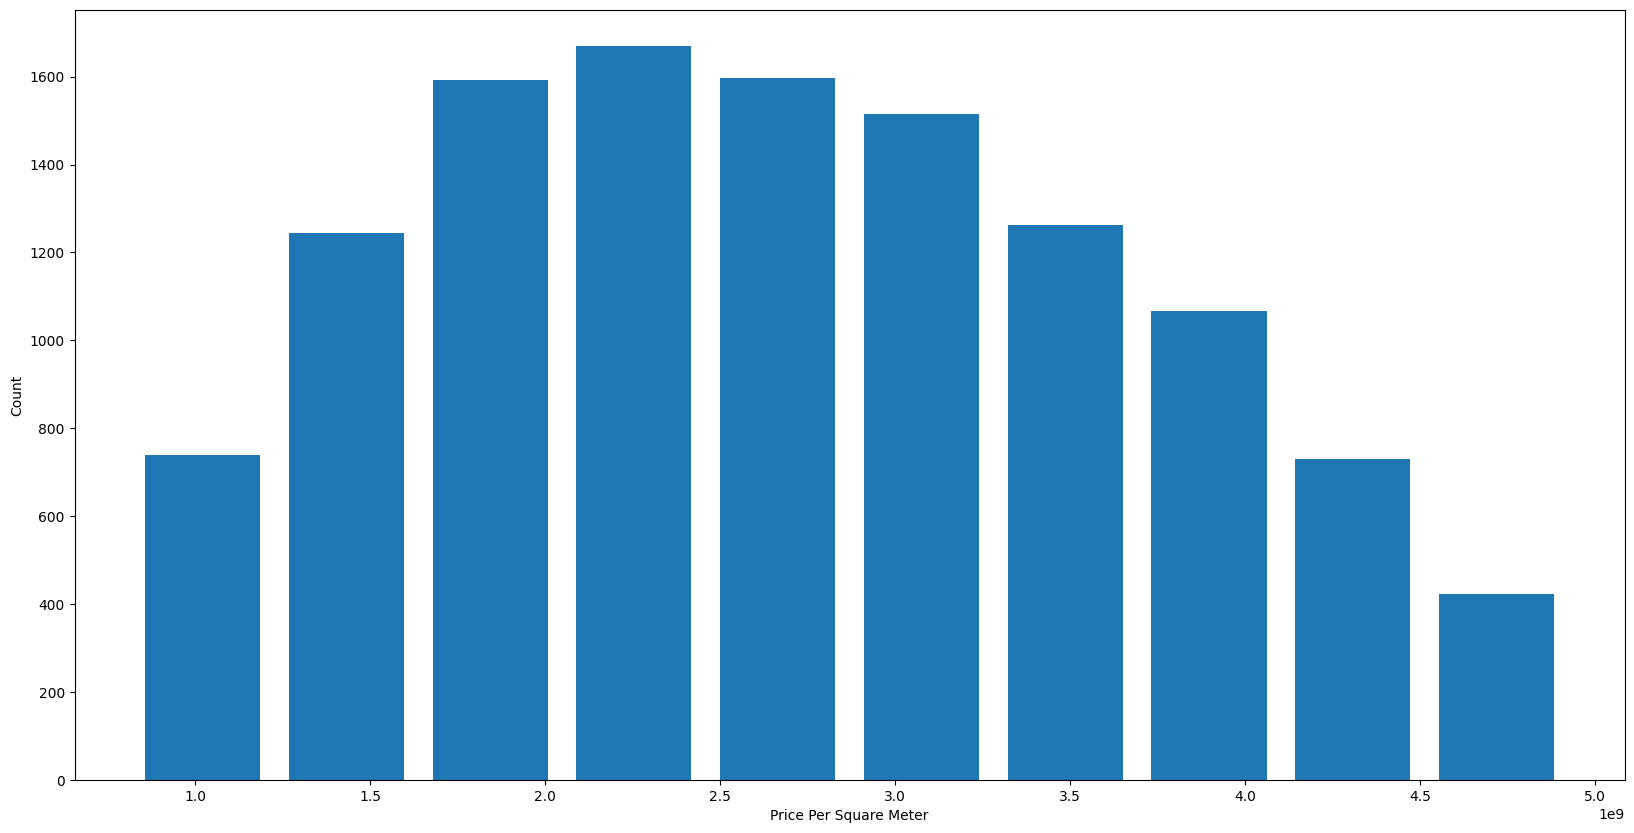

In [586]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqm,rwidth=0.8)
plt.xlabel("Price Per Square Meter")
plt.ylabel("Count")

In [587]:
df6.Number_of_Bedrooms.unique()

array([4, 2, 3, 5, 1], dtype=int64)

In [588]:
df6.Number_of_Bathrooms.unique()

array([2, 1, 3], dtype=int64)

In [589]:
df6.Number_of_Floors.unique()

array([3, 1, 2], dtype=int64)

In [590]:
df6.Parking_Space.unique()

array([1, 0], dtype=int64)

Text(0, 0.5, 'Count')

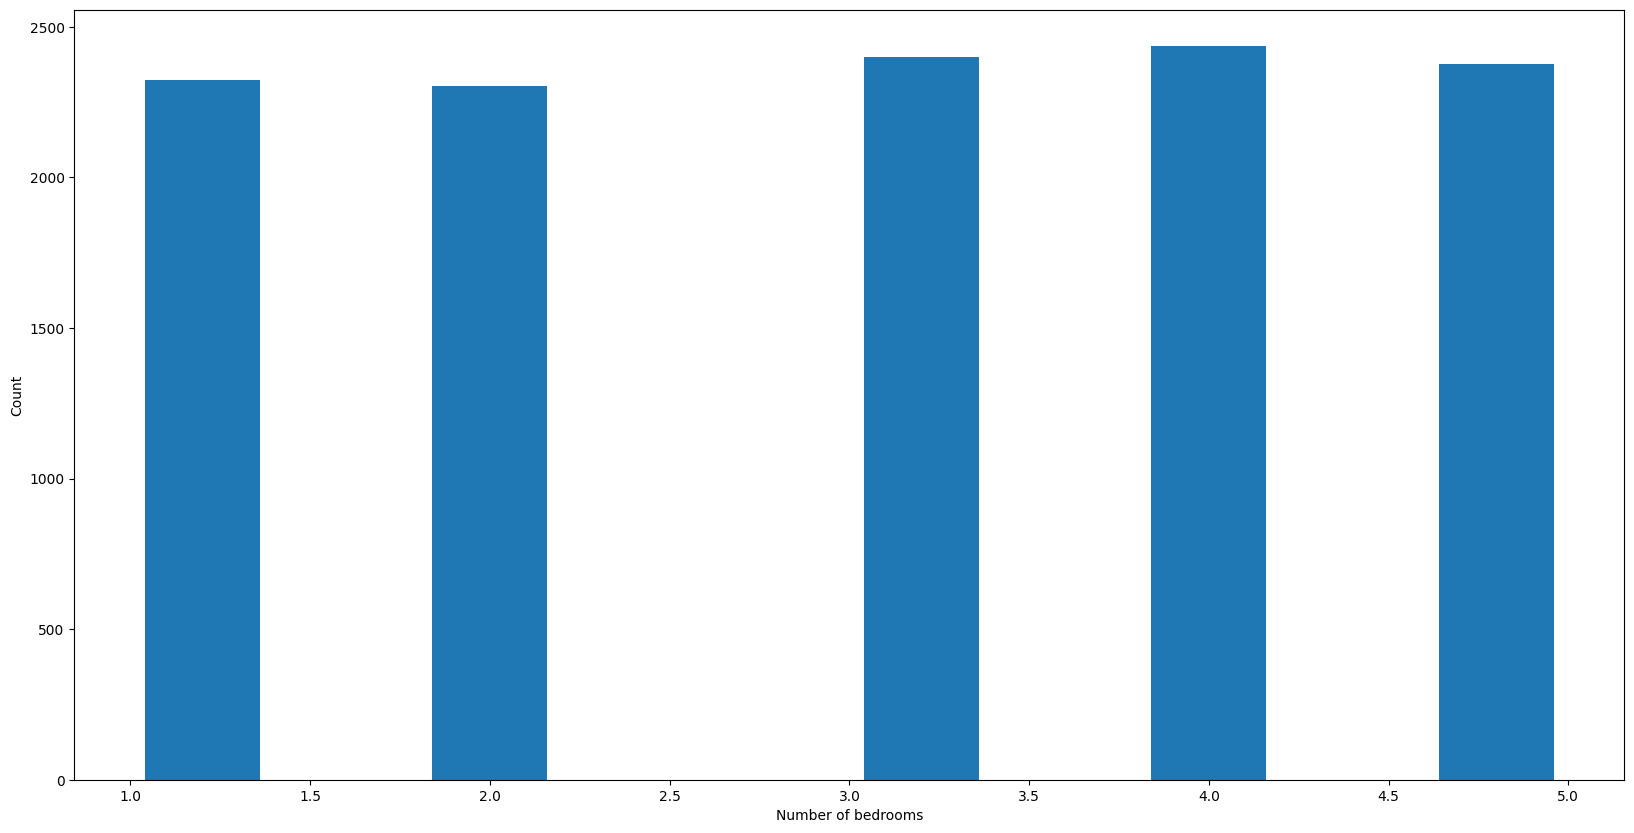

In [591]:
plt.hist(df6.Number_of_Bedrooms,rwidth=0.8)
plt.xlabel("Number of bedrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

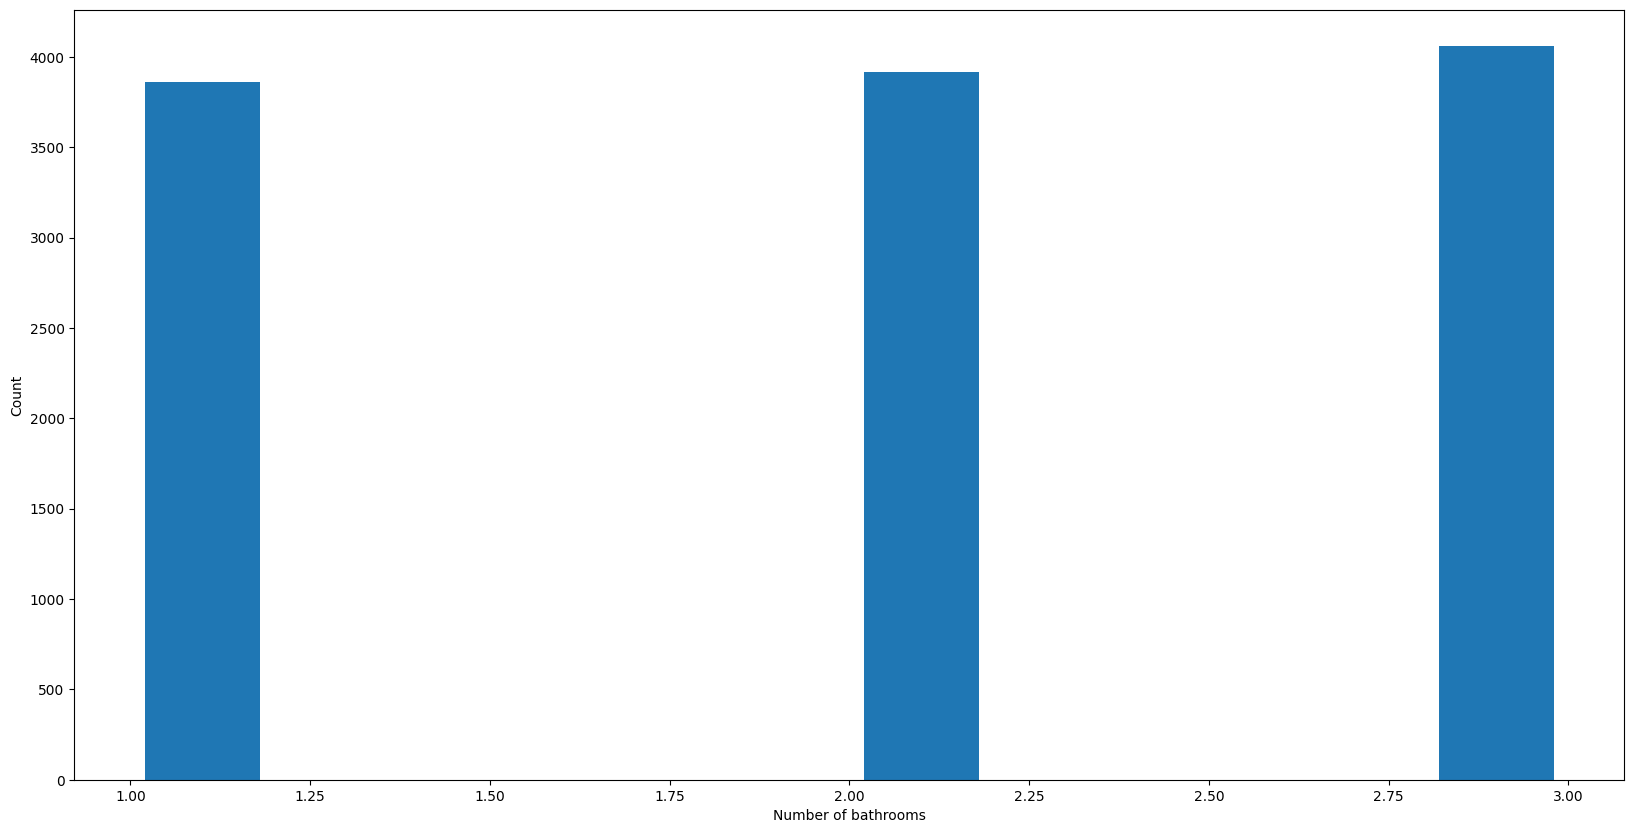

In [592]:
plt.hist(df6.Number_of_Bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

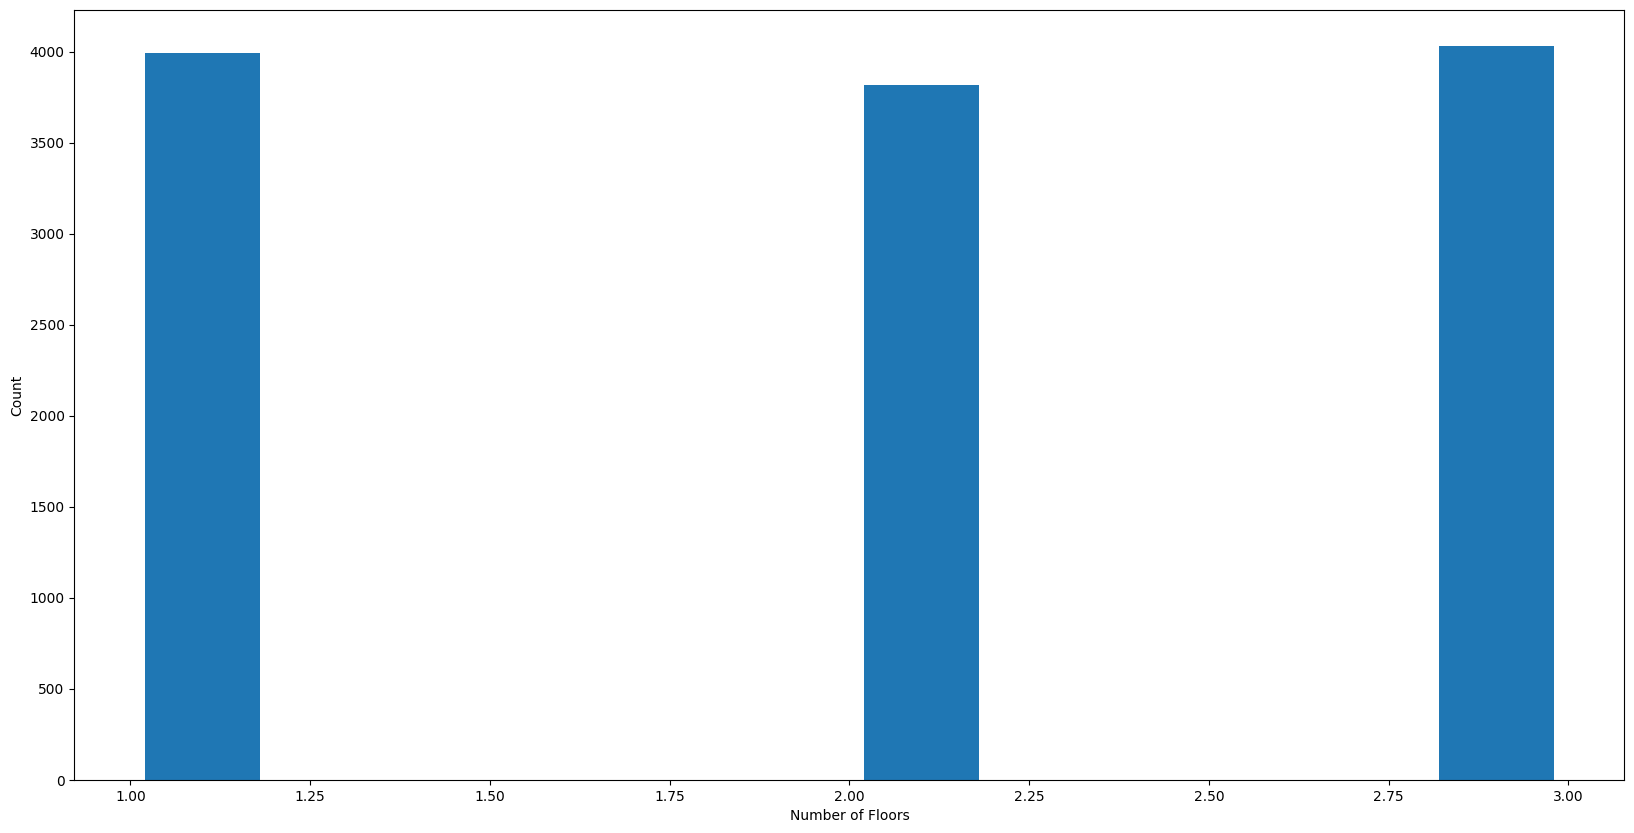

In [593]:
plt.hist(df6.Number_of_Floors,rwidth=0.8)
plt.xlabel("Number of Floors")
plt.ylabel("Count")

In [594]:
df6.head()

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Year_Built,Parking_Space,Furnished,Proximity_to_City_Center_km,Proximity_to_Schools_km,Price_RWF,price_per_sqm
0,Gacuriro,Villa,149,4,2,3,2015,1,1,2.929362,1.466844,4019396,2.697581e+09
1,Gacuriro,Bungalow,214,2,2,3,2009,1,1,0.969455,1.283705,5488265,2.564610e+09
2,Gacuriro,Bungalow,135,3,2,1,2014,0,0,5.106890,1.952470,6448699,4.776814e+09
3,Gacuriro,Bungalow,109,5,1,1,1997,1,1,4.830527,0.000000,2097434,1.924251e+09
4,Gacuriro,Bungalow,98,5,2,2,2002,1,0,3.123421,0.682185,3088646,3.151680e+09


In [595]:
# Clear Unwanted features(Not Important)
df7 = df6.drop(['price_per_sqm','Proximity_to_City_Center_km','Proximity_to_Schools_km','Furnished','Year_Built'],axis='columns')
df7.head(3)

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Parking_Space,Price_RWF
0,Gacuriro,Villa,149,4,2,3,1,4019396
1,Gacuriro,Bungalow,214,2,2,3,1,5488265
2,Gacuriro,Bungalow,135,3,2,1,0,6448699


<h2 style='color:blue'>Use One Hot Encoding For Location</h2>

In [596]:
len(df7)

11839

In [597]:
dummies=pd.get_dummies(df7.Location).astype(int).head(20)
dummies

,Gacuriro,Kacyiru,Kanombe,Kibagabaga,Kicukiro,Kimironko,Nyamirambo,Nyarutarama,Remera
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0


In [598]:
len(dummies)

20

In [599]:
# Concantenate above values to dataset and drop last column
df8 = pd.concat([df7, dummies.drop('Remera', axis=1)], axis='columns')
df8.head(3)

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Parking_Space,Price_RWF,Gacuriro,Kacyiru,Kanombe,Kibagabaga,Kicukiro,Kimironko,Nyamirambo,Nyarutarama
0,Gacuriro,Villa,149,4,2,3,1,4019396,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Gacuriro,Bungalow,214,2,2,3,1,5488265,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Gacuriro,Bungalow,135,3,2,1,0,6448699,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [600]:
dummies2=pd.get_dummies(df8.Property_Type).astype(int).head(20)
dummies2

,Apartment,Bungalow,House,Villa
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,1,0,0,0
6,1,0,0,0
7,0,1,0,0
8,0,0,1,0
9,0,0,1,0


In [601]:
# Concantenate above values to dataset and drop last column
df9 = pd.concat([df8, dummies2], axis='columns')
df9.head(3)

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Parking_Space,Price_RWF,Gacuriro,Kacyiru,Kanombe,Kibagabaga,Kicukiro,Kimironko,Nyamirambo,Nyarutarama,Apartment,Bungalow,House,Villa
0,Gacuriro,Villa,149,4,2,3,1,4019396,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Gacuriro,Bungalow,214,2,2,3,1,5488265,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Gacuriro,Bungalow,135,3,2,1,0,6448699,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [602]:
df9.tail()

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Parking_Space,Price_RWF,Gacuriro,Kacyiru,Kanombe,Kibagabaga,Kicukiro,Kimironko,Nyamirambo,Nyarutarama,Apartment,Bungalow,House,Villa
11834,Remera,Villa,193,3,3,3,1,4774224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11835,Remera,Bungalow,191,5,1,2,1,5345439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11836,Remera,House,167,2,3,3,0,5994209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11837,Remera,House,221,3,3,2,1,4165359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11838,Remera,House,134,4,1,1,0,2494411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [603]:
df10= df9.dropna()
df10.isnull().sum()

Location               0
Property_Type          0
Size_sqm               0
Number_of_Bedrooms     0
Number_of_Bathrooms    0
Number_of_Floors       0
Parking_Space          0
Price_RWF              0
Gacuriro               0
Kacyiru                0
Kanombe                0
Kibagabaga             0
Kicukiro               0
Kimironko              0
Nyamirambo             0
Nyarutarama            0
Apartment              0
Bungalow               0
House                  0
Villa                  0
dtype: int64

In [604]:
df10.shape

(20, 20)

In [605]:
df10.head()

,Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Parking_Space,Price_RWF,Gacuriro,Kacyiru,Kanombe,Kibagabaga,Kicukiro,Kimironko,Nyamirambo,Nyarutarama,Apartment,Bungalow,House,Villa
0,Gacuriro,Villa,149,4,2,3,1,4019396,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Gacuriro,Bungalow,214,2,2,3,1,5488265,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Gacuriro,Bungalow,135,3,2,1,0,6448699,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Gacuriro,Bungalow,109,5,1,1,1,2097434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Gacuriro,Bungalow,98,5,2,2,1,3088646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [606]:
df11= df10.drop(['Location','Property_Type'], axis=1) #drop location and proprty type to train model
df11

,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Parking_Space,Price_RWF,Gacuriro,Kacyiru,Kanombe,Kibagabaga,Kicukiro,Kimironko,Nyamirambo,Nyarutarama,Apartment,Bungalow,House,Villa
0,149,4,2,3,1,4019396,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,214,2,2,3,1,5488265,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,135,3,2,1,0,6448699,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,109,5,1,1,1,2097434,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,98,5,2,2,1,3088646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,163,1,3,2,1,4273818,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,156,5,1,1,0,4362796,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,71,1,2,3,0,2478037,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,148,1,2,3,1,2466239,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,77,5,2,1,0,2951350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<h2 style='color:blue'>Build a Model Now...</h2>

In [607]:
# Dependent Variables
X= df11.drop('Price_RWF', axis=1)
X.head()

,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Parking_Space,Gacuriro,Kacyiru,Kanombe,Kibagabaga,Kicukiro,Kimironko,Nyamirambo,Nyarutarama,Apartment,Bungalow,House,Villa
0,149,4,2,3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,214,2,2,3,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,135,3,2,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,109,5,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,98,5,2,2,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [608]:
# Independent Variables

y = df11.Price_RWF
y.head()

0    4019396
1    5488265
2    6448699
3    2097434
4    3088646
Name: Price_RWF, dtype: int64

In [609]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [610]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

# My Accuracy is Descent Now

0.7133717674011526

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [611]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 0.71337177, -1.67610779, -7.77496242, -0.04755704,  0.93802697])

<h2 style='color:blue'>Find best model using GridSearchCV</h2>

In [612]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage
find_best_model_using_gridsearchcv(X, y)



C:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.515e+12, tolerance: 4.021e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.546e+12, tolerance: 3.742e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check t

,model,best_score,best_params
0,linear_regression,-1.569446,{'fit_intercept': True}
1,lasso,-1.569410,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,-20.063957,"{'criterion': 'squared_error', 'splitter': 'ra..."


<h2 style='color:blue'>Test the model for few properties</h2>

In [617]:
# Now our LinearRegreession Scores Good, Let use the one with 82%

def predict_price(Location,Property_Type,Size_sqm,Number_of_Bedrooms,Number_of_Bathrooms,Number_of_Floors,Parking_Space):    
    loc_index = np.where(X.columns==Location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Size_sqm
    x[1] = Number_of_Bedrooms
    x[2] = Number_of_Bathrooms
    x[3]= Number_of_Floors
    x[4]= Parking_Space
    if loc_index >= 0:
        x[loc_index] = 1

    elif loc_index >=1:
        x[loc_index] = 2

    return lr_clf.predict([x])[0]

In [618]:
X.columns

Index(['Size_sqm', 'Number_of_Bedrooms', 'Number_of_Bathrooms',
       'Number_of_Floors', 'Parking_Space', 'Gacuriro', 'Kacyiru', 'Kanombe',
       'Kibagabaga', 'Kicukiro', 'Kimironko', 'Nyamirambo', 'Nyarutarama',
       'Apartment', 'Bungalow', 'House', 'Villa'],
      dtype='object')

In [619]:
np.where(X.columns=='Gacuriro')[0][0] #accessed 7th column

5

In [620]:
# PREDICT
# location,sqft,bath,bhk

predict_price('Kicukiro','Bungalow', 1000,2, 1, 1,0)

C:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


22921480.09977243

In [622]:
# PREDICT
# location,sqft,bath,bhk

predict_price('Gacuriro','Villa', 300,2, 1, 1,0)

C:\Users\Etienne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6432774.958840798

In [623]:
import pickle
with open('model/kigali_model.pickle','wb') as f:
    pickle.dump(lr_clf,f) #lr_clf  (Name of you classifier with descent accuracy)

In [624]:
import json
# columns for our final dataset trained in order to integrate in UI in Python Flask Server
columns = {
    'data_columns' : [col.lower() for col in X.columns] # everything converted in lowercase
}
with open("json/columns.json","w") as f:
    f.write(json.dumps(columns))